#pip install numpy pandas matplotlib seaborn tensorflow scikit-learn

In [18]:
pip install numpy pandas matplotlib seaborn tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11; 1.26.0 Requires-Python <3.13,>=3.9; 1.26.1 Requires-Python <3.13,>=3.9
ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow


  Using cached numpy-2.1.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.9.2-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)


#Mengimpor Library yang Dibutuhkan

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Import Keras & TensorFlow libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint


#Preprocessing Data 

In [2]:
base_dir = r'D:\Users\KULIAH\SEMESTER 5\AI\MK\tugas 2 baru\Data'  # Ganti dengan path dataset Anda

# Preprocessing data
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Membuat generator untuk data latih
train_generator = train_datagen.flow_from_directory(
    base_dir,  # Path folder dataset
    target_size=(150, 150),  # Ukuran gambar yang akan diubah
    batch_size=32,
    class_mode='categorical'  # Kategori untuk multi-class
)

# Membuat generator untuk data validasi (gunakan data latih untuk validasi sementara)
validation_generator = test_datagen.flow_from_directory(
    base_dir,  # Path folder dataset
    target_size=(150, 150),  # Ukuran gambar yang akan diubah
    batch_size=32,
    class_mode='categorical'
)


Found 3096 images belonging to 4 classes.
Found 3096 images belonging to 4 classes.


#Membangun Model CNN dan Komplikasi Model

In [3]:
model = Sequential()

# Layer konvolusi pertama
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer konvolusi kedua
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten dan Fully Connected Layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout untuk regularisasi
model.add(Dense(4, activation='softmax'))  # 4 kelas tumor

# Compile Model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\jhann\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Menambahkan Callback: TensorBoard dan ModelCheckpoint

In [4]:
tensorboard_callback = TensorBoard(log_dir='./tensorboard_logs/')
checkpoint_callback = ModelCheckpoint(
    filepath='./saved_model/best_model.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)


#Melatih Model

In [5]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=10,  # Tentukan jumlah epoch
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    callbacks=[tensorboard_callback, checkpoint_callback]
)


c:\Users\jhann\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 64s 641ms/step - accuracy: 0.3929 - loss: 1.3176 - val_accuracy: 0.7184 - val_loss: 0.7540
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7083 - loss: 0.8049 - val_accuracy: 0.7083 - val_loss: 0.8058
Epoch 3/10


c:\Users\jhann\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 146ms/step - accuracy: 0.7145 - loss: 0.7524 - val_accuracy: 0.8464 - val_loss: 0.4575
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8438 - loss: 0.5941 - val_accuracy: 0.9583 - val_loss: 0.3308
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 144ms/step - accuracy: 0.8201 - loss: 0.4528 - val_accuracy: 0.9508 - val_loss: 0.2330
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8438 - loss: 0.3904 - val_accuracy: 1.0000 - val_loss: 0.1959
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 141ms/step - accuracy: 0.9039 - loss: 0.2869 - val_accuracy: 0.9753 - val_loss: 0.1099
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.8750 - loss: 0.2693 - val_accuracy: 0.9583 - val_loss: 0.0857
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 142ms/step - accuracy: 0.9254 - loss: 0.2125 - val_accuracy: 0.9811 - val_loss: 0.0781
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.9062 - loss: 0.2430 - val_accuracy: 0.9583 - val

In [ ]:
#Evaluasi Model pada Data Uji

In [12]:
# Evaluasi performa model pada data uji
test_loss, test_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // 32, verbose=1)

# Menampilkan hasil
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9810 - loss: 0.0712
Test Loss: 0.0697
Test Accuracy: 98.50%


#Visualisasi Hasil Pelatihan: Akurasi dan Loss

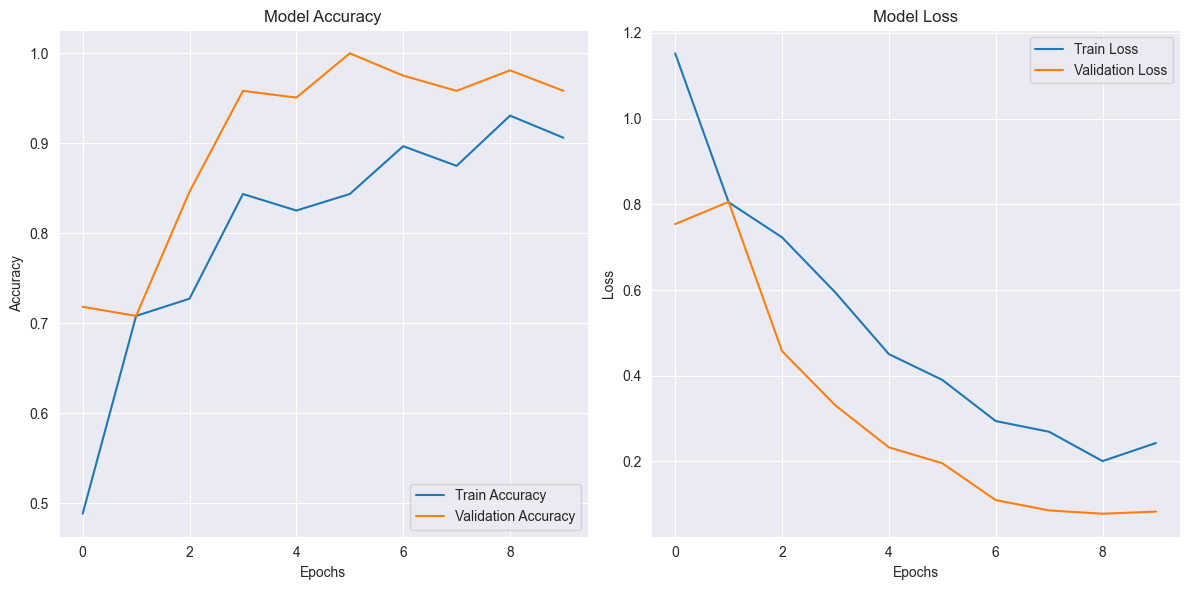

In [7]:
import matplotlib.pyplot as plt

# Plotting Training and Validation Accuracy and Loss
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Display the plots
plt.tight_layout()
plt.show()


#Menyimpan Model Akhir

In [13]:
# Menyimpan Model Akhir dalam format .h5
model.save('./saved_model/final_model.h5')  # Menyimpan model akhir dalam format .h5